# EDA and Statistical Analysis of Used Car Data (Edmunds.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
pd.options.display.float_format = '{:.2f}'.format
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

warnings.filterwarnings("ignore")
pd.set_option("display.max_column",100)
from scipy.stats import shapiro
from scipy.stats import kruskal


# This notebook contains used car data from Edmunds.com 

* Data has been scraped from Edmunds.com in March 2024 by me

* We have 264k rows of data

* Throughout the notebook I have applied Statistical Analysis and Exploratory Data Analysis in order to gain insights from the Second Hand Car Market in the US.

## * You can feel free to reach out to me on Linkedin --> linkedin.com/in/emir-tatlici


In [2]:
data = pd.read_csv("/kaggle/input/edmunds-data/edmunds_son_veri.csv",index_col=0)
df=data.copy()
df.drop(columns=["publish_date","first_published_date","guaranteed_price_expire_date","guaranteed_price_delta","display_price_delta","loan_payment","dealer_phone","display_price_delta_timestamp","in_transit"],inplace=True)
df[["make","model"]] =df["make_model"].str.split("|",expand=True)

In [3]:
country_dict = {
    'Toyota': 'Japan', 'Ford': 'USA',
    'Chevrolet': 'USA','Honda': 'Japan',
    'Nissan': 'Japan',   'Jeep': 'USA',   'BMW': 'Germany',   'Hyundai': 'South Korea',   'Mercedes-Benz': 'Germany',
    'Kia': 'South Korea',   'Volkswagen': 'Germany',   'Ram': 'USA',   'Subaru': 'Japan',   'Audi': 'Germany',  'GMC': 'USA',  'Lexus': 'Japan',  'Mazda': 'Japan',  'Tesla': 'USA',  'Cadillac': 'USA',  'Chrysler': 'USA',  'Acura': 'Japan',
    'Porsche': 'Germany',   'Land Rover': 'UK','INFINITI': 'Japan','Buick': 'USA',  'Volvo': 'Sweden',  'MINI': 'UK',  'Mitsubishi': 'Japan',  'Jaguar': 'UK',  'Genesis': 'South Korea',  'Alfa Romeo': 'Italy',  'Maserati': 'Italy',  'FIAT': 'Italy',
    'Ferrari': 'Italy', 'Lamborghini': 'Italy',  'Rolls-Royce': 'UK',  'Aston Martin': 'UK',  'HUMMER': 'USA',  'McLaren': 'UK',  'Bentley': 'UK', 'Rivian': 'USA'
}
df['country'] = df['make'].map(country_dict)

In [4]:
df.drop(columns=["vin","vid"],inplace=True)
df.head()

,stock_number,type,seller_comments,dealer_address,dealer_city,dealer_state,dealer_zip,dealer_name,mileage,exterior_color,interior_color,drive_train,cylinders,engine_size,engine_type,fuel_type,transmission,style,year,epa_combined_mpg,epa_city_mpg,epa_highway_mpg,base_msrp,total_msrp,display_price,make_model,model_id,trim,style_id,style_description,sub_models,body_type,vehicle_style,oem_model_code,make,model,country
0,300669T,USED,Estimated monthly payment and estimated total ...,4608 St Barnabas Rd,Temple Hills,MD,20748,Global Auto Outlet,170912.00,Blizzard Pearl,Black leather,four wheel drive,6.00,4.00,gas,regular unleaded,Automatic,Limited 4dr SUV 4WD (4.0L 6cyl 5A),2016,18.00,17.00,21.00,44360.00,46245.00,16966.00,Toyota|4Runner,200747158,Limited,200747162.00,Limited 4dr SUV 4WD (4.0L 6cyl 5A),4Runner SUV,SUV,4dr SUV,8668,Toyota,4Runner,Japan
1,297313,USED,The 2019 Toyota Highlander LE is a well-built ...,14524 Richmond Hwy,Woodbridge,VA,22191,Carget Motors,96990.00,Predawn Gray Mica,Ash cloth,front wheel drive,6.00,3.50,gas,regular unleaded,Automatic,LE 4dr SUV (3.5L 6cyl 8A),2019,23.00,20.00,27.00,33880.00,35000.00,18999.00,Toyota|Highlander,401778550,LE,401778553.00,LE 4dr SUV (3.5L 6cyl 8A),Highlander SUV,SUV,4dr SUV,6946,Toyota,Highlander,Japan
2,LP071998,USED,Recent Arrival! 4WD. *WELL MAINTAINED FJ CRUSE...,9215 Harford Rd,Baltimore,MD,21234,Heritage Volkswagen Parkville,122598.00,Silver Fresco Metallic/White Roof,Dark Charcoal premium cloth,four wheel drive,6.00,4.00,gas,premium unleaded (recommended),Automatic,4dr SUV 4WD (4.0L 6cyl 5A),2010,18.00,17.00,21.00,25770.00,26580.00,19400.00,Toyota|FJ Cruiser,100529049,Base,101200686.00,4dr SUV 4WD (4.0L 6cyl 5A),FJ Cruiser SUV,SUV,4dr SUV,4704,Toyota,FJ Cruiser,Japan
3,79304,USED,This 2018 Toyota Tundra 4dr features a 5.7L 8 ...,518 520 S Broad St,Elizabeth,NJ,7201,JD Motors,75098.00,Midnight Black Metallic,Black cloth,four wheel drive,8.00,5.70,gas,regular unleaded,Automatic,SR5 4dr CrewMax 4WD SB (5.7L 8cyl 6A),2018,14.00,13.00,17.00,39770.00,41165.00,26900.00,Toyota|Tundra,401728856,SR5,401728912.00,SR5 4dr CrewMax 4WD SB (5.7L 8cyl 6A),Tundra CrewMax Cab,Pickup,Crew Cab Pickup,8361,Toyota,Tundra,Japan
4,39296,USED,This 2017 Toyota Corolla 4dr features a 1.8L 4...,674 Garden St,Elizabeth,NJ,7202,Auto Outlet,54862.00,Classic Silver Metallic,Black Mixed Media Fabric w/Black Cherry Stitch...,front wheel drive,4.00,1.80,gas,regular unleaded,Automatic,50th Anniversary Special Edition 4dr Sedan (1....,2017,31.00,28.00,35.00,21900.00,23770.00,12057.00,Toyota|Corolla,401668008,50th Anniversary Special Edition,401668048.00,50th Anniversary Special Edition 4dr Sedan (1....,Corolla Sedan,Sedan,Sedan,1865,Toyota,Corolla,Japan


## TL;DR

### CONCLUSIONS OF THE ANALYSIS HAS BEEN CONDUCTED BELOW
----- 
Statistical Analysis 
* At 99% of significance level there are price differences between body types

* At 99% of significance level there are no price differences between prices in different states.

* Engine Types and Transmisson types are causing price difference between cars.


-----

Correlation 

* There is a Spearman correlation coefficient of -0.79 between Year and Mileage. In our dataset, as the year increases (newer cars), the mileage decreases

* There is a Spearman correlation coefficient of -0.71 between Display Price and Mileage. This indicates that as the mileage of the vehicle increases, the price decreases.

* There is a Pearson correlation coefficient of +0.93 between Engine Size and Cylinders. This means that as the engine size increases, the number of cylinders also increases.

* There is a Spearman correlation coefficient of +0.71 between Display Price and Year. This indicates a non-linear positive relationship, where the price increases as the year progresses (approaching the present).

------
Data Analysis

* SUV's are the most frequent body type of the cars in the US (52% of the cars are SUV)

* Average price of a car in the US is 27k USD

* WA(Washington) has the highest average price in the United States

* MO(Missouri) has the lowest average price in the United States

* Automatic Transmission is the most frequent transmission type

* Ferrari has the highest average price in the dataset(Between the makes that occured at least 50 times in the dataset.)

*  FIAT has the lowest average price in the dataset(Between the makes that occured at least 50 times in the dataset.)

* McLaren Senna has highest Price in the Dataset with a price a tag of 1.1 million usd.


------
Data Analysis Part 2
* Honda is the most frequent car in the United States used car Market.

* Rivian is the least frequent car in the United States used car Market.

* Most frequent cars are generally in the Very-High Mileage segment While rare cars in Low Mileage segment.

* Most frequent cars has significantly much lower prices than the Rare cars.

------
Data Analysis Part 3
*  Cars with higher average mileage tends to be in a low price segment. In the other hand low mileage puts the cars in to higher price segments based on the data we have.

* Only 20% of the cars in low mileage segment other 80% are in medium(>20k) and higher mileage group.

* 66% of the cars are in the new and recent segment, which means 66% of the cars are less than 6 years old.

*  Hummer takes the lead in terms of average mileage and average age.

* Ferrari and McLaren has the lowest average mileage in the dataset.

*  Vehicles with higher average mileage tends to be SUV.
------
Data Analysis Part 4
* Electric-included cars are generally in the low and medium mileage segments. We might say that owners of these cars aim to sell them at a high value while their batteries are still in good condition.

* Electric-included cars are generally more expensive than non-electric cars(except diesel.)

--------
Data Analysis Part 5
*  We see that Coupe Body Type takes the lead in terms of average Price, and Most Common brand is BMW in this group. Also, In terms of average mileage coupe cars has the lowest mean mileage.

*  Station wagon and Hatchbacks has the lowest average price.

* South Korean and Japanese cars are the cheapest cars in the dataset 

* Italian and English cars are the most expensive cars.

--------------------
Data Analysis Part 6

* Higher the price segment is lower the mean/median mileage we have.

* As mileage goes up our price segment goes low.

In [5]:
sample_df = df.sample(n=1000, random_state=43) 

## Do the prices in the population and sample follow a normal distribution?

In [6]:

population = df["display_price"]

stat, p_value = shapiro(population)

print("Population Normality Test Results:")
print("Test Statistic:", stat)
print("P-value:", p_value)

sample = sample_df["display_price"]

stat, p_value = shapiro(sample)

print("\nSample Normality Test Results:")
print("Test Statistic:", stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("\nThe vehicle price data in the population does not follow a normal distribution.")
else:
    print("\nThe vehicle price data in the population follows a normal distribution.")

if p_value < 0.05:
    print("The vehicle price data in the sample does not follow a normal distribution.")
else:
    print("The vehicle price data in the sample follows a normal distribution.")

Population Normality Test Results:
Test Statistic: 0.5331149101257324
P-value: 0.0

Sample Normality Test Results:
Test Statistic: 0.6210414171218872
P-value: 3.3603137174509113e-42

The vehicle price data in the population does not follow a normal distribution.
The vehicle price data in the sample does not follow a normal distribution.


## Since the population does not follow a normal distribution, the tests we use will be non-parametric.
----------------------------------------------------------------------------------------------------------






## Let's examine the distribution of vehicle prices in our population and sample

* Log transformation was applied to prices to prevent the graph from becoming meaningless due to outliers in our data
* After log transformation, the price distributions in the population and sample were similar


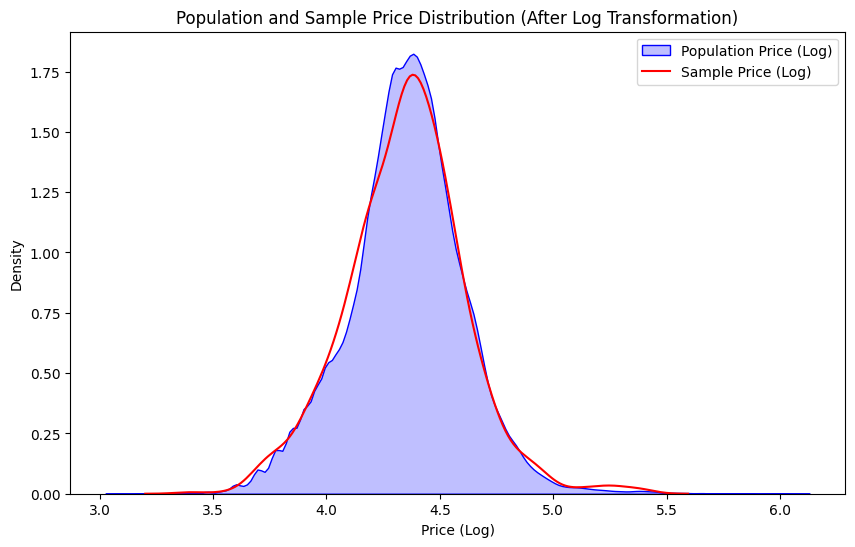

In [7]:
population_price = df["display_price"]
sample_price = sample_df["display_price"]

population_price_log = np.log10(population_price)
sample_price_log = np.log10(sample_price)

plt.figure(figsize=(10, 6))

sns.kdeplot(population_price_log, color='blue', label='Population Price (Log)', fill=True)
sns.kdeplot(sample_price_log, color='red', label='Sample Price (Log)', fill=False)

plt.xlabel('Price (Log)')
plt.ylabel('Density')
plt.title('Population and Sample Price Distribution (After Log Transformation)')
plt.legend()
plt.ticklabel_format(style='plain')

plt.show()

## Is there a significant price difference based on the body types of vehicles?

In [8]:
groups = [group["display_price"] for name, group in sample_df.groupby("body_type")]

h_statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis Test Result:")
print("H-Statistic:", h_statistic)
print("p-value:", p_value)

if p_value < 0.01:
    print("At a 99% confidence level, there is a significant price difference between vehicle types (Sedan, SUV, etc.).")
else:
    print("There is no significant price difference between vehicle types (Sedan, SUV, etc.).")


Kruskal-Wallis Test Result:
H-Statistic: 114.30062398276154
p-value: 4.96397179235599e-21
At a 99% confidence level, there is a significant price difference between vehicle types (Sedan, SUV, etc.).


## Is there a significant price difference based on the engine types of vehicles?


In [9]:
groups = [group["display_price"] for name, group in sample_df.groupby("engine_type")]

h_statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis Test Result:")
print("H-Statistic:", h_statistic)
print("p-value:", p_value)

if p_value < 0.01:
    print("There is a significant price difference based on the engine types of vehicles.")
else:
    print("There is no significant price difference based on the engine types of vehicles.")

Kruskal-Wallis Test Result:
H-Statistic: 134.22677216849937
p-value: 1.6540754153152745e-26
There is a significant price difference based on the engine types of vehicles.


## Is there a significant price difference based on the states of the vehicles?


In [10]:

groups = [group["display_price"] for name, group in sample_df.groupby("dealer_state")]

h_statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis Test Result:")
print("H-Statistic:", h_statistic)
print("p-value:", p_value)

if p_value < 0.01:
    print("There is a significant price difference based on the states of the vehicles.")
else:
    print("There is no significant price difference based on the states of the vehicles.")


Kruskal-Wallis Test Result:
H-Statistic: 44.193407789692706
p-value: 0.05870058678152295
There is no significant price difference based on the states of the vehicles.


## Is there a significant price difference based on the interior colors of vehicles?

In [11]:
groups = [group["display_price"] for name, group in sample_df.groupby("interior_color")]

h_statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis Test Result:")
print("H-Statistic:", h_statistic)
print("p-value:", p_value)

if p_value < 0.01:
    print("There is a significant price difference based on the interior colors of vehicles.")
else:
    print("There is no significant price difference based on the interior colors of vehicles.")


Kruskal-Wallis Test Result:
H-Statistic: 512.9354246345156
p-value: 7.460184478324424e-15
There is a significant price difference based on the interior colors of vehicles.


## Is there a significant price difference based on the transmission types of vehicles?

In [12]:
groups = [group["display_price"] for name, group in sample_df.groupby("transmission")]

h_statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis Test Result:")
print("H-Statistic:", h_statistic)
print("p-value:", p_value)

if p_value < 0.01:
    print("There is a significant price difference based on the transmission types of vehicles.")
else:
    print("There is no significant price difference based on the transmission types of vehicles.")

Kruskal-Wallis Test Result:
H-Statistic: 25.17870017988306
p-value: 1.4167495595562402e-05
There is a significant price difference based on the transmission types of vehicles.


## Is there a significant price difference based on the countries of vehicle brands?

In [13]:

groups = [group["display_price"] for name, group in sample_df.groupby("country")]

h_statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis Test Result:")
print("H-Statistic:", h_statistic)
print("p-value:", p_value)

if p_value < 0.01:
    print("There is a significant price difference based on the countries of vehicle brands.")
else:
    print("There is no significant price difference based on the countries of vehicle brands.")


Kruskal-Wallis Test Result:
H-Statistic: 105.80634343763562
p-value: 1.537420037719127e-20
There is a significant price difference based on the countries of vehicle brands.


## Average price of the cars based on body types(Population and Sample(n=1000))


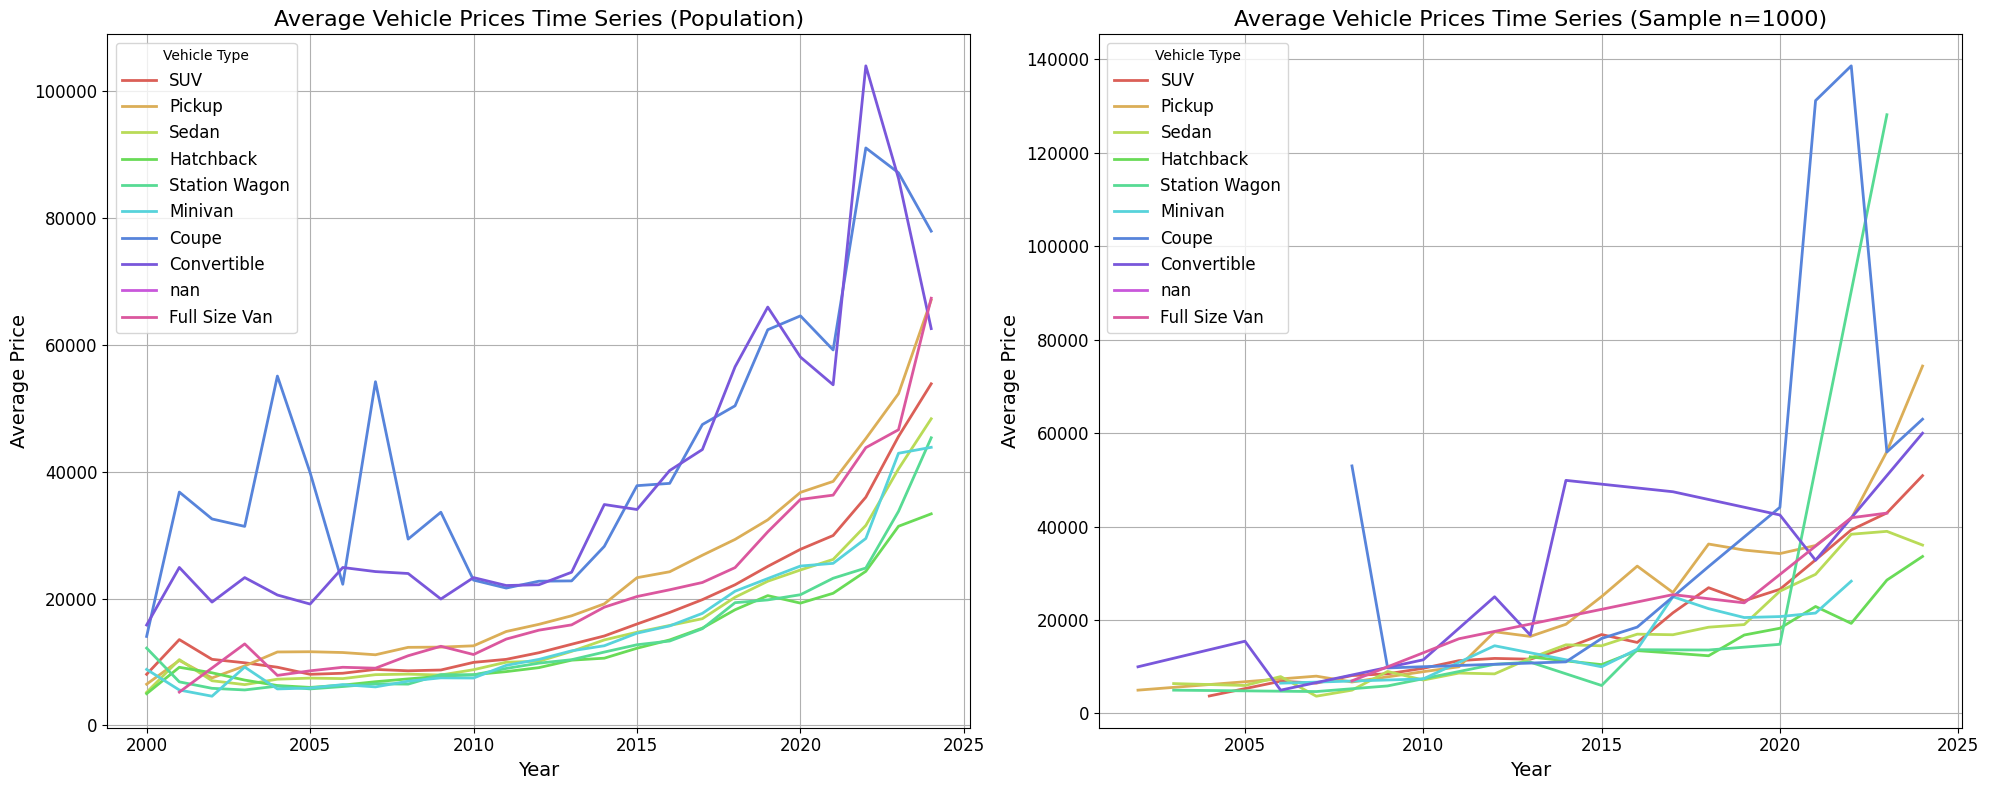

In [14]:
vehicle_types = df['body_type'].unique()
palette = sns.color_palette("hls", len(vehicle_types))

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
for i, vehicle_type in enumerate(vehicle_types):
    subset = df[df['body_type'] == vehicle_type]
    mean_prices = subset.groupby('year')['display_price'].mean()
    plt.plot(mean_prices.index, mean_prices.values, label=vehicle_type, color=palette[i], linewidth=2)
plt.title('Average Vehicle Prices Time Series (Population)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.legend(title='Vehicle Type', loc='upper left', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 2, 2)
for i, vehicle_type in enumerate(vehicle_types):
    subset = sample_df[sample_df['body_type'] == vehicle_type]
    mean_prices = subset.groupby('year')['display_price'].mean()
    plt.plot(mean_prices.index, mean_prices.values, label=vehicle_type, color=palette[i], linewidth=2)
plt.title('Average Vehicle Prices Time Series (Sample n=1000)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.legend(title='Vehicle Type', loc='upper left', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


## Let's Look at the Distribution of some categorical variables in our dataset.

## Let's take a look at Spearman and Pearson Correlations 

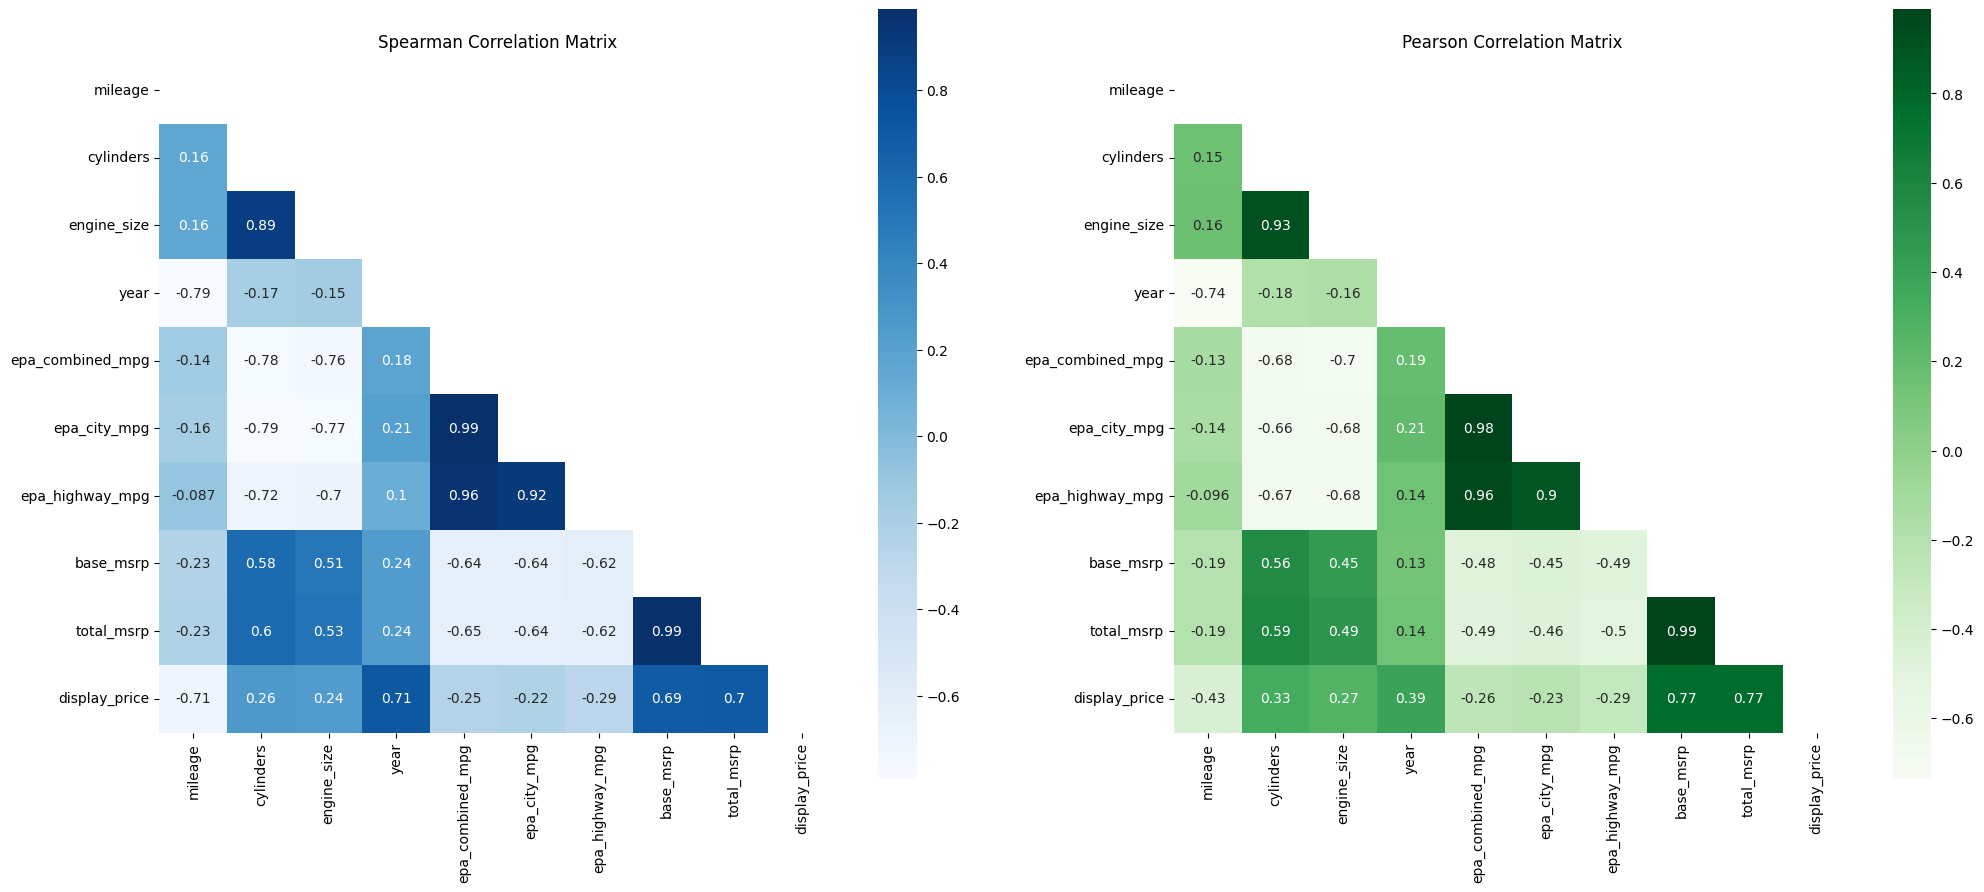

In [15]:

corr_spearman = df.drop(columns=["dealer_zip", "model_id", "style_id"]).select_dtypes(include="number").corr("spearman")
corr_pearson = df.drop(columns=["dealer_zip", "model_id", "style_id"]).select_dtypes(include="number").corr("pearson")


plt.figure(figsize=(24, 10))

plt.subplot(1, 2, 1)  
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))
sns.heatmap(corr_spearman, annot=True, cmap='Blues', square=True, cbar=True, mask=mask)
plt.title('Spearman Correlation Matrix')

plt.subplot(1, 2, 2)  
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))
sns.heatmap(corr_pearson, annot=True, cmap='Greens', square=True, cbar=True, mask=mask)
plt.title('Pearson Correlation Matrix')
plt.show()

## The Pearson Correlation Coefficient is used to measure linear relationships, the Spearman Correlation Coefficient is used to measure both non-linear and linear relationships.

## Positive Relationships

* There is a Pearson correlation coefficient of +0.93 between Engine Size and Cylinders. This means that as the engine size increases, the number of cylinders also increases.

* There is a Spearman correlation coefficient of +0.71 between Display Price and Year. This indicates a non-linear positive relationship, where the price increases as the year progresses (approaching the present).

* There is a Spearman correlation coefficient of +0.60 between Total MSRP and Cylinders. This shows a moderate non-linear relationship, where the number of cylinders affects the manufacturer's suggested retail price.

* There is a Pearson correlation coefficient of +0.77 between Total MSRP and Display Price. This indicates a moderate-high linear relationship, suggesting that the higher the manufacturer's suggested price, the higher the second-hand listing price.

------------------------------------------------------------------------------------------------------------------------

##  Negative Relationships

* There is a Spearman correlation coefficient of -0.79 between Year and Mileage. In our dataset, as the year increases (newer cars), the mileage decreases.

* There is a Spearman correlation coefficient of -0.78 between EPA Combined MPG (miles per gallon) and Cylinders. This means that as the number of cylinders increases, the miles per gallon decrease.

* There is a Spearman correlation coefficient of -0.78 between EPA Combined MPG (miles per gallon) and Engine Size. This means that as the engine size increases, the miles per gallon decrease.

* There is a Spearman correlation coefficient of -0.71 between Display Price and Mileage. This indicates that as the mileage of the vehicle increases, the price decreases.

------------------------------------------------------------------------------------------------

## I am going to apply segmentation for numerical values in order to enhance our analysis

In [16]:
#Segment by year
df['vehicle_age'] = 2024 - df['year']
age_bins = [-1, 3, 6, 10, float('inf')]
age_labels = ['New', 'Recent', 'Old', 'Very Old']
df['age_segment'] = pd.cut(df['vehicle_age'], bins=age_bins, labels=age_labels)


# Segment by mileage
mileage_bins = [0, 20000, 50000, 80000, float('inf')]
mileage_labels = ['Low Mileage', 'Medium Mileage', 'High Mileage', 'Very High Mileage']
df['mileage_segment'] = pd.cut(df['mileage'], bins=mileage_bins, labels=mileage_labels)

#Segment by engine
df['engine_segment'] = df['engine_type'] + ' ' + df['engine_size'].astype(str)

#Segment by price
price_bins = [0, 20000, 40000, 60000, 80000, float('inf')]
price_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k+']
df['price_segment'] = pd.cut(df['display_price'], bins=price_bins, labels=price_labels, right=False)


# Q/A Part.
----------------------------------------

## Q1- List the highest and lowest 5 states with highest display_price based on mean

* Answer 1.1: WA(Washington) has the highest average price in the United States

* Answer 1.2 : MO(Missouri) has the lowest average price in the United States
------------------------------------------------------------------------------------------
* Insight 1.1 : We see that both groups are using new cars based in our segmentation

* Insight 1.2 : We also see that both groups are using mostly SUV's


In [17]:
top_5_states = df.groupby("dealer_state").filter(lambda x: len(x) >= 100)\
                            .groupby('dealer_state')['display_price'].mean()\
                            .nlargest(5)

result_top5 = df[df['dealer_state'].isin(top_5_states.index)]\
            .groupby('dealer_state').agg(avg_price=('display_price', 'mean'), 
                                         most_common_body_type=('body_type', lambda x: x.value_counts().idxmax()),
                                         most_common_country_of_cars=('country', lambda x: x.value_counts().idxmax()),
                                         most_common_brand=('make', lambda x: x.value_counts().idxmax()),
                                         most_common_age_segment=("age_segment",lambda x: x.value_counts().idxmax()),
                                         vehicle_age_avg = ("vehicle_age","mean")

                                         )

result_top5= result_top5.loc[top_5_states.index]
result_top5

,avg_price,most_common_body_type,most_common_country_of_cars,most_common_brand,most_common_age_segment,vehicle_age_avg
dealer_state,,,,,,
WA,32749.73,SUV,Germany,BMW,New,3.75
DE,31790.37,SUV,USA,Jeep,New,5.53
OR,31001.40,SUV,Germany,Mercedes-Benz,New,4.56
NY,30048.14,SUV,Japan,Honda,New,4.75
IA,29879.96,SUV,Germany,BMW,New,5.19


In [18]:
bottom_5_states = df.groupby("dealer_state").filter(lambda x: len(x) >= 100)\
                            .groupby('dealer_state')['display_price'].mean()\
                            .nsmallest(5)

result_bottom5 = df[df['dealer_state'].isin(bottom_5_states.index)]\
            .groupby('dealer_state').agg(avg_price=('display_price', 'mean'), 
                                         most_common_body_type=('body_type', lambda x: x.value_counts().idxmax()),
                                         most_common_country_of_cars=('country', lambda x: x.value_counts().idxmax()),
                                         most_common_brand=('make', lambda x: x.value_counts().idxmax()),
                                         most_common_age_segment=("age_segment",lambda x: x.value_counts().idxmax()),
                                         vehicle_age_avg = ("vehicle_age","mean")
                                          )

result_bottom5= result_bottom5.loc[bottom_5_states.index]
result_bottom5

,avg_price,most_common_body_type,most_common_country_of_cars,most_common_brand,most_common_age_segment,vehicle_age_avg
dealer_state,,,,,,
MO,18869.25,SUV,South Korea,Hyundai,New,3.11
LA,20286.45,SUV,South Korea,Hyundai,New,3.00
CO,22057.72,SUV,USA,Hyundai,New,2.86
WI,22592.68,SUV,Japan,Honda,New,4.41
NV,22653.87,SUV,USA,Chrysler,New,3.84


## Q2- List the highest and lowest 5 makes based on mean of display price.

* Answer 2.1 : Ferrari has the highest average price in the dataset(Between the makes that occured at least 50 times in the dataset.)

* Answer 2.2 : FIAT has the lowest average price in the dataset(Between the makes that occured at least 50 times in the dataset.)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* Insight 2.1 : Both Cheapest and Highest priced cars are from Italy.

* Insight 2.2 : While highest price cars are in Low Mileage segment we can't say the same thing for the cars with lower price.

* Insight 2.3 : Both group cars are in "New" segment of age except(FIAT) 

* Insight 2.4 : When we look at lowest price cars we see a significant price differences between 2 lowest car brands FIAT and Nissan. FIAT has a price nearly 50% lower and it is located in "Old" age_segment. When I see this I got suspicious whether FIAT is exporting their brand to US anymore?

In [19]:
top_5_makes = df.groupby("make").filter(lambda x: len(x) >= 50)\
                            .groupby('make')['display_price'].mean()\
                            .nlargest(5)

result_top5_makes = df[df['make'].isin(top_5_makes.index)]\
            .groupby('make').agg(avg_price=('display_price', 'mean'), 
                                         most_common_body_type=('body_type', lambda x: x.value_counts().idxmax()),
                                         country_of_the_brand=('country', lambda x: x.value_counts().idxmax()),
                                         most_common_age_segment=("age_segment",lambda x: x.value_counts().idxmax()),
                                         most_common_mileage_segment=("mileage_segment",lambda x: x.value_counts().idxmax()),
                                         vehicle_age_avg = ("vehicle_age","mean"),
                                                         most_common_model_of_the_brand=('model', lambda x: x.value_counts().idxmax()),

                                          )

result_top5_makes= result_top5_makes.loc[top_5_makes.index]
result_top5_makes

,avg_price,most_common_body_type,country_of_the_brand,most_common_age_segment,most_common_mileage_segment,vehicle_age_avg,most_common_model_of_the_brand
make,,,,,,,
Ferrari,310953.39,Convertible,Italy,New,Low Mileage,7.65,488 Spider
Lamborghini,260392.33,SUV,Italy,New,Low Mileage,5.03,Urus
Rolls-Royce,258338.22,Sedan,UK,New,Low Mileage,5.87,Ghost
McLaren,237857.59,Coupe,UK,Recent,Low Mileage,4.89,720S
Aston Martin,157376.50,Coupe,UK,New,Low Mileage,5.52,Vantage


In [20]:
lowest_5_makes = df.groupby("make").filter(lambda x: len(x) >= 50)\
                            .groupby('make')['display_price'].mean()\
                            .nsmallest(5)

result_lowest5_makes = df[df['make'].isin(lowest_5_makes.index)]\
            .groupby('make').agg(avg_price=('display_price', 'mean'), 
                                         most_common_body_type=('body_type', lambda x: x.value_counts().idxmax()),
                                         country_of_the_brand=('country', lambda x: x.value_counts().idxmax()),
                                         most_common_age_segment=("age_segment",lambda x: x.value_counts().idxmax()),
                                         most_common_mileage_segment=("mileage_segment",lambda x: x.value_counts().idxmax()),
                                         vehicle_age_avg = ("vehicle_age","mean")
                                          ,                most_common_model_of_the_brand=('model', lambda x: x.value_counts().idxmax()),
)

result_lowest5_makes= result_lowest5_makes.loc[lowest_5_makes.index]
result_lowest5_makes

,avg_price,most_common_body_type,country_of_the_brand,most_common_age_segment,most_common_mileage_segment,vehicle_age_avg,most_common_model_of_the_brand
make,,,,,,,
FIAT,12995.09,Hatchback,Italy,Old,High Mileage,8.64,500
Nissan,18058.23,SUV,Japan,New,Very High Mileage,6.09,Rogue
Hyundai,18102.66,SUV,South Korea,New,Medium Mileage,5.37,Elantra
Mitsubishi,18427.26,SUV,Japan,New,High Mileage,4.56,Outlander Sport
MINI,19200.46,Hatchback,UK,New,Medium Mileage,6.83,Cooper


## Q3.2 Analysis of FIAT data.

* FIAT car instances range from 2012 to 2023, indicating that FIAT cars have been present in the US market until 2024.

* When examining the prices of FIAT cars, 2016 emerges as a pivotal year. This is because the majority of our cars are from before 2016, and there is a noticeable difference in prices before and after this year.

* FIAT cars from "before 2016" have an average price of $9,200.

* FIAT cars from "after 2016" have an average price of $19,100.

* Since most of our instances occurred before 2016, our average price tends to be closer to these values. Additionally, FIAT produces low-price cars, which means that higher prices do not significantly impact our mean. This is in contrast to supercar models, where higher prices have a more pronounced effect.

Minimum year of FIAT cars 2012
Maximum year of FIAT cars 2023


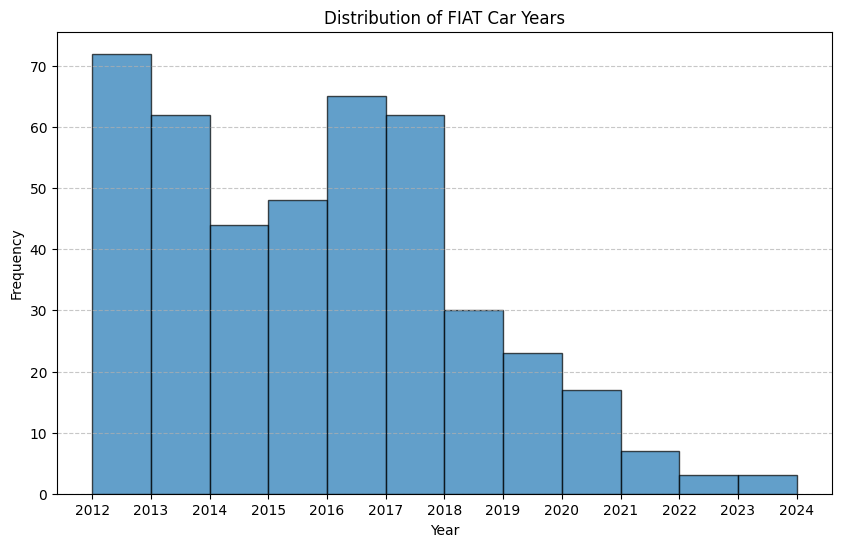

In [21]:
print("Minimum year of FIAT cars",df[df["make"]=="FIAT"]["year"].min())
print("Maximum year of FIAT cars",df[df["make"]=="FIAT"]["year"].max())

fiat_cars = df[df["make"] == "FIAT"]
plt.figure(figsize=(10, 6))
plt.hist(fiat_cars["year"], bins=range(2012, 2025), edgecolor='black', alpha=0.7)
plt.title('Distribution of FIAT Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(range(2012, 2025))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

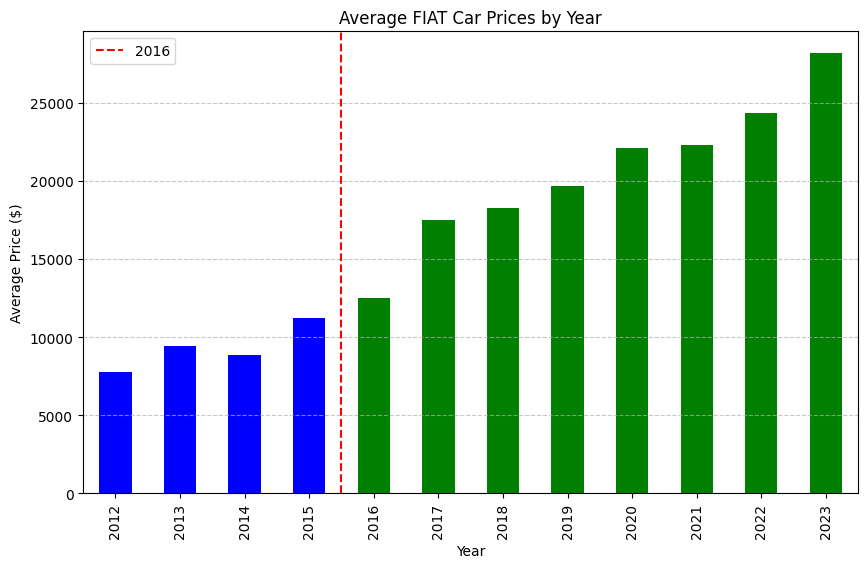

In [22]:
average_prices = df[df["make"] == "FIAT"].groupby("year")["display_price"].mean()
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color=['blue' if year < 2016 else 'green' for year in average_prices.index])
plt.axvline(x=3.5, color='red', linestyle='--', label='Year 2016') 
plt.title('Average FIAT Car Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.legend(['2016'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Q3- List the 5 most and least frequent cars and their characteristics.

* Answer 3.1 : Honda is the most frequent car in the United States used car Market.

* Answer 3.2  : Rivian is the least frequent car in the United States used car Market.
--------------------------------------------------------------------------------------------------------------------------
* Insight 3.1 : Both groups are in "New" age segment in most of their cars in the dataset.

* Insight 3.2 : SUV's are the most common body type for most frequent car brands

* Insight 3.3 : Most frequent cars are generally in the Very-High Mileage segment While rare cars in Low Mileage segment.

* Insight 3.4 : Most frequent cars has significantly much lower prices than the Rare cars.



In [23]:
top_5_frequent_makes = df['make'].value_counts().nlargest(5).index
result_top_5_frequent_makes = df[df['make'].isin(top_5_frequent_makes)]\
            .groupby('make').agg(
                avg_price=('display_price', 'mean'), 
                most_common_body_type=('body_type', lambda x: x.value_counts().idxmax()),
                country_of_the_brand=('country', lambda x: x.value_counts().idxmax()),
                most_common_age_segment=('age_segment', lambda x: x.value_counts().idxmax()),
                most_common_mileage_segment=('mileage_segment', lambda x: x.value_counts().idxmax()),            
                vehicle_age_avg=('vehicle_age', 'mean'),
                most_common_model_of_the_brand=('model', lambda x: x.value_counts().idxmax()),

            )

result_top_5_frequent_makes = result_top_5_frequent_makes.loc[top_5_frequent_makes]
result_top_5_frequent_makes

,avg_price,most_common_body_type,country_of_the_brand,most_common_age_segment,most_common_mileage_segment,vehicle_age_avg,most_common_model_of_the_brand
make,,,,,,,
Honda,20098.48,SUV,Japan,New,Very High Mileage,6.58,CR-V
Ford,27018.47,SUV,USA,New,Very High Mileage,5.58,F-150
Nissan,18058.23,SUV,Japan,New,Very High Mileage,6.09,Rogue
Jeep,24911.36,SUV,USA,New,Medium Mileage,5.44,Grand Cherokee
BMW,34660.77,SUV,Germany,New,Medium Mileage,5.38,3 Series


In [24]:
lowest_5_frequent_makes = df['make'].value_counts().nsmallest(5).index

result_lowest_5_frequent_makes = df[df['make'].isin(lowest_5_frequent_makes)]\
            .groupby('make').agg(
                avg_price=('display_price', 'mean'), 
                most_common_body_type=('body_type', lambda x: x.value_counts().idxmax()),
                country_of_the_brand=('country', lambda x: x.value_counts().idxmax()),
                most_common_age_segment=('age_segment', lambda x: x.value_counts().idxmax()),
                most_common_mileage_segment=('mileage_segment', lambda x: x.value_counts().idxmax()),
                vehicle_age_avg=('vehicle_age', 'mean'),
                most_common_model_of_the_brand=('model', lambda x: x.value_counts().idxmax()),

            )

result_lowest_5_frequent_makes = result_lowest_5_frequent_makes.loc[lowest_5_frequent_makes]
result_lowest_5_frequent_makes

,avg_price,most_common_body_type,country_of_the_brand,most_common_age_segment,most_common_mileage_segment,vehicle_age_avg,most_common_model_of_the_brand
make,,,,,,,
Rivian,79006.83,SUV,USA,New,Low Mileage,1.34,R1S
McLaren,237857.59,Coupe,UK,Recent,Low Mileage,4.89,720S
Rolls-Royce,258338.22,Sedan,UK,New,Low Mileage,5.87,Ghost
Lamborghini,260392.33,SUV,Italy,New,Low Mileage,5.03,Urus
Aston Martin,157376.50,Coupe,UK,New,Low Mileage,5.52,Vantage


## Q4- List the top and lowest 5 brand characteristics based on mean mileage of the cars.

* Insight 4.1 : Hummer takes the lead in terms of average mileage and average age.

* Insight 4.2 : Ferrari and McLaren has the lowest average mileage in the dataset.

* Insight 4.3 : Cars with higher average mileage tends to be in a low price segment. In the other hand low mileage puts the cars in to higher price segments based on the data we have.

* Insight 4.4 : Vehicles with higher average mileage tends to be SUV.

In [25]:
top_5_makes_mileage = df.groupby('make').filter(lambda x: len(x) >= 50)\
                            .groupby('make')['mileage'].mean()\
                            .nlargest(5)

result_top5_makes_mileage = df[df['make'].isin(top_5_makes_mileage.index)]\
            .groupby('make').agg(
                avg_mileage=('mileage', 'mean'), 
                most_common_body_type=('body_type', lambda x: x.value_counts().idxmax()),
                country_of_the_brand=('country', lambda x: x.value_counts().idxmax()),
                most_common_price_segment=('price_segment', lambda x: x.value_counts().idxmax()),
                most_common_age_segment=('age_segment', lambda x: x.value_counts().idxmax()),
                vehicle_age_avg=('vehicle_age', 'mean'),
                                most_common_model_of_the_brand=('model', lambda x: x.value_counts().idxmax()),

            )

result_top5_makes_mileage = result_top5_makes_mileage.loc[top_5_makes_mileage.index]

print("Top 5 makes based on mean of mileage:")
result_top5_makes_mileage



Top 5 makes based on mean of mileage:


,avg_mileage,most_common_body_type,country_of_the_brand,most_common_price_segment,most_common_age_segment,vehicle_age_avg,most_common_model_of_the_brand
make,,,,,,,
HUMMER,128507.03,SUV,USA,0-20k,Very Old,17.75,H3
Toyota,87309.94,SUV,Japan,0-20k,Very Old,8.33,RAV4
Chrysler,75302.58,Minivan,USA,20k-40k,New,6.35,Pacifica
Chevrolet,73592.81,SUV,USA,0-20k,Recent,6.90,Silverado 1500
Honda,67648.14,SUV,Japan,0-20k,New,6.58,CR-V


In [26]:
bottom_5_makes_mileage = df.groupby('make').filter(lambda x: len(x) >= 50)\
                            .groupby('make')['mileage'].mean()\
                            .nsmallest(5)

result_bottom5_makes_mileage = df[df['make'].isin(bottom_5_makes_mileage.index)]\
            .groupby('make').agg(
                avg_mileage=('mileage', 'mean'), 
                most_common_body_type=('body_type', lambda x: x.value_counts().idxmax()),
                most_common_price_segment=('price_segment', lambda x: x.value_counts().idxmax()),
                country_of_the_brand=('country', lambda x: x.value_counts().idxmax()),
                most_common_age_segment=('age_segment', lambda x: x.value_counts().idxmax()),
                vehicle_age_avg=('vehicle_age', 'mean'),
                                most_common_model_of_the_brand=('model', lambda x: x.value_counts().idxmax()),

            )

result_bottom5_makes_mileage = result_bottom5_makes_mileage.loc[bottom_5_makes_mileage.index]

print("\Lowest 5 makes based on mean of mileage:")
result_bottom5_makes_mileage


\Lowest 5 makes based on mean of mileage:


,avg_mileage,most_common_body_type,most_common_price_segment,country_of_the_brand,most_common_age_segment,vehicle_age_avg,most_common_model_of_the_brand
make,,,,,,,
Ferrari,9827.66,Convertible,80k+,Italy,New,7.65,488 Spider
McLaren,9884.38,Coupe,80k+,UK,Recent,4.89,720S
Aston Martin,12910.59,Coupe,80k+,UK,New,5.52,Vantage
Lamborghini,13848.24,SUV,80k+,Italy,New,5.03,Urus
Rolls-Royce,21054.18,Sedan,80k+,UK,New,5.87,Ghost


## Q5- List the all of the 8 engine type characteristics based on mean display price of the cars.

* Insight 5.1 : Electric-included cars are generally in the low and medium mileage segments. We might say that owners of these cars aim to sell them at a high value while their batteries are still in good condition.

* Insight 5.2  Electric-included cars are generally more expensive than non-electric cars(except diesel.)

In [27]:
top_5_makes_engine_type = df.groupby('engine_type').filter(lambda x: len(x) >= 5)\
                            .groupby('engine_type')['display_price'].mean()\
                            .nlargest(8)

result_top5_makes_engine_type = df[df['engine_type'].isin(top_5_makes_engine_type.index)]\
            .groupby('engine_type').agg(
                avg_price=('display_price', 'mean'), 
                most_common_body_type=('body_type', lambda x: x.value_counts().idxmax()),
                most_common_brand_and_model=('make_model', lambda x: x.value_counts().idxmax()),
                most_common_price_segment=('price_segment', lambda x: x.value_counts().idxmax()),
                most_common_age_segment=('age_segment', lambda x: x.value_counts().idxmax()),
                vehicle_age_avg=('vehicle_age', 'mean'),
                vehicle_avg_mileage=("mileage",'mean'),
                vehicle_mileage_segment=("mileage_segment",lambda x: x.value_counts().idxmax())
            )

result_top5_makes_engine_type = result_top5_makes_engine_type.loc[top_5_makes_engine_type.index]

result_top5_makes_engine_type



,avg_price,most_common_body_type,most_common_brand_and_model,most_common_price_segment,most_common_age_segment,vehicle_age_avg,vehicle_avg_mileage,vehicle_mileage_segment
engine_type,,,,,,,,
mild hybrid,50595.78,SUV,Ram|1500,40k-60k,New,2.24,24908.54,Low Mileage
diesel,44624.14,Pickup,Ram|2500,40k-60k,New,5.37,65943.31,Very High Mileage
electric,38928.37,SUV,Tesla|Model 3,20k-40k,New,3.06,26355.26,Low Mileage
plug-in hybrid,37231.18,SUV,Chrysler|Pacifica,20k-40k,New,3.31,34924.57,Low Mileage
hybrid,25354.30,SUV,Toyota|Prius,20k-40k,New,5.52,58395.94,Medium Mileage
gas,25125.52,SUV,Honda|CR-V,20k-40k,New,5.80,58722.94,Medium Mileage
flex-fuel (FFV),19490.58,SUV,Jeep|Grand Cherokee,0-20k,Old,8.86,100061.93,Very High Mileage
natural gas (CNG),16086.07,Full Size Van,Chevrolet|Express Cargo,0-20k,Very Old,10.87,52250.07,Medium Mileage


## Q6- List the all of the body types with its characteristics based on mean display price of the cars.

* Insight 6.1 : We see that Coupe Body Type takes the lead in terms of average Price, and Most Common brand is BMW in this group. Also, In terms of average mileage coupe cars has the lowest mean mileage.

* Insight 6.2 : Station wagon and Hatchbacks has the lowest average price.

* Insight 6.3 :  Hyundai and BMW is the most common brand for 4 Body types(2 for each brand.)

* Insight 6.4 :While Coupé and Convertible are the most expensive body types, they fall into the old and very old age segments. This raises the question of how these cars can remain expensive despite their age. The explanation lies in the limited manufacturing of Supercars and Luxury cars, leading owners to keep them in garages or drive them sparingly. The rarity of these cars maintains their value over time

In [28]:
top_body_type_price = df.groupby('body_type').filter(lambda x: len(x) >= 1)\
                            .groupby('body_type')['display_price'].mean()\
                            .nlargest(15)

result_top_body_type_price = df[df['body_type'].isin(top_body_type_price.index)]\
            .groupby('body_type').agg(
                avg_price=('display_price', 'mean'), 
                most_common_brand=('make', lambda x: x.value_counts().idxmax()),
                most_common_age_segment=('age_segment',lambda x: x.value_counts().idxmax()),
                avg_mileage=("mileage","mean"),
                most_common_mileage_segment=("mileage_segment",lambda x: x.value_counts().idxmax())

            )

result_top_body_type_price = result_top_body_type_price.loc[top_body_type_price.index]

print("Top 5 body types based on mean of mileage and price:")
result_top_body_type_price



Top 5 body types based on mean of mileage and price:


,avg_price,most_common_brand,most_common_age_segment,avg_mileage,most_common_mileage_segment
body_type,,,,,
Coupe,49141.90,BMW,Old,49790.77,Low Mileage
Convertible,41565.64,BMW,Very Old,51277.67,Medium Mileage
Pickup,33214.57,Ram,New,64387.86,Very High Mileage
Full Size Van,32396.01,Ford,New,66106.60,Very High Mileage
SUV,27528.94,Jeep,New,53354.47,Medium Mileage
Sedan,21540.24,Hyundai,New,62233.62,Very High Mileage
Minivan,20786.43,Chrysler,New,81977.02,Very High Mileage
Hatchback,17491.93,Hyundai,New,60953.01,Very High Mileage
Station Wagon,17355.18,Kia,Old,72223.88,Very High Mileage


## Q7- List the Mean,Median Price of the cars. 

In [29]:
print("Mean Display Price of the Cars -->  " ,df["display_price"].mean())
print("Median Display Price of the Cars -->  " ,df["display_price"].median())

Mean Display Price of the Cars -->   26955.176543100122
Median Display Price of the Cars -->   22888.0


## Q8- List the cars with Maximum and Minimum prices with its characteristics.

* Mclaren Senna is the most expensive car in the dataset with the price tag of $1,117,000.00

* Infiniti q50 is the cheapest car in the dataset is INFINITI Q50 with the price tag of 1125$


In [30]:
df[df['display_price'] == df['display_price'].max()]

,stock_number,type,seller_comments,dealer_address,dealer_city,dealer_state,dealer_zip,dealer_name,mileage,exterior_color,interior_color,drive_train,cylinders,engine_size,engine_type,fuel_type,transmission,style,year,epa_combined_mpg,epa_city_mpg,epa_highway_mpg,base_msrp,total_msrp,display_price,make_model,model_id,trim,style_id,style_description,sub_models,body_type,vehicle_style,oem_model_code,make,model,country,vehicle_age,age_segment,mileage_segment,engine_segment,price_segment
4648,KW800320,CPO,McLaren Certified! Clean Carfax! Bespoke Optio...,1631 West Chester Pike,West Chester,PA,19382,McLaren Philadelphia,4953.00,NaN,NaN,rear wheel drive,8.00,4.00,gas,premium unleaded (required),Automated Manual,2dr Coupe (4.0L 8cyl Turbo 7AM),2019,16.00,14.00,18.00,958966.00,963966.00,1170000.00,McLaren|Senna,401854935,Base,401854939.00,2dr Coupe (4.0L 8cyl Turbo 7AM),Senna Coupe,Coupe,Coupe,NaN,McLaren,Senna,UK,5,Recent,Low Mileage,gas 4.0,80k+


In [31]:
df[df['display_price'] == df['display_price'].min()]

,stock_number,type,seller_comments,dealer_address,dealer_city,dealer_state,dealer_zip,dealer_name,mileage,exterior_color,interior_color,drive_train,cylinders,engine_size,engine_type,fuel_type,transmission,style,year,epa_combined_mpg,epa_city_mpg,epa_highway_mpg,base_msrp,total_msrp,display_price,make_model,model_id,trim,style_id,style_description,sub_models,body_type,vehicle_style,oem_model_code,make,model,country,vehicle_age,age_segment,mileage_segment,engine_segment,price_segment
23335,C24JOLL9,USED,NaN,251 S Main St,East Windsor,CT,6088,Better Buys Auto,69800.00,Graphite Shadow,Graphite premium leather,all wheel drive,6.00,3.00,gas,premium unleaded (required),Automatic,RED SPORT 400 4dr Sedan AWD (3.0L 6cyl Turbo 7A),2018,22.00,19.00,26.00,53000.00,57335.00,1225.00,INFINITI|Q50,401725849,RED SPORT 400,401725852.00,RED SPORT 400 4dr Sedan AWD (3.0L 6cyl Turbo 7A),"Q50 Sedan, Q50 RED SPORT 400",Sedan,Sedan,91618,INFINITI,Q50,Japan,6,Recent,High Mileage,gas 3.0,0-20k


## Q8 - Visualize and Interpret the Mean and Median of Car Display Prices by Country

* Insight 8.1: When we look at both graphs, we see huge differences. For example, when Italian cars have a Median price of 30k, in terms of Mean we see 72k. This can be caused by the fact that there are 3 Supercar brands in Italy, which can cause our mean to rise. For this reason, it's better to look at the median or use metrics based on country characteristics. On the other hand, in other countries, mean and median display prices follow similar prices with small differences.

* Insight 8.2 South Korea and Japan has the lowest display prices on both metrics.


In [32]:
top_10_countries_median = df.groupby('country').filter(lambda x: len(x) >= 10)\
                            .groupby('country')['display_price'].median()\
                            .sort_values(ascending=False)\
                            .head(10)
top_10_countries_median = top_10_countries_median.reset_index()

top_10_countries_mean = df.groupby('country').filter(lambda x: len(x) >= 10)\
                          .groupby('country')['display_price'].mean()\
                          .sort_values(ascending=False)\
                          .head(10)
top_10_countries_mean = top_10_countries_mean.reset_index()

fig1 = px.bar(top_10_countries_median, 
              x='display_price', 
              y='country', 
              orientation='h',
              title='Countries by Median Display Price (At least 10 times occurred in the dataset)',
              labels={'display_price': 'Median Display Price', 'country': 'Country'},
              color_discrete_sequence=px.colors.qualitative.Vivid
)

fig2 = px.bar(top_10_countries_mean, 
              x='display_price', 
              y='country', 
              orientation='h',
              title='Countries by Mean Display Price (At least 10 times occurred in the dataset)',
              labels={'display_price': 'Mean Display Price', 'country': 'Country'},
              color_discrete_sequence=px.colors.qualitative.G10
)

fig1.update_xaxes(title_text='Median Display Price (USD)')
fig1.update_yaxes(title_text='Country')

fig2.update_xaxes(title_text='Mean Display Price (USD)')
fig2.update_yaxes(title_text='Country')

fig = make_subplots(rows=1, cols=2, subplot_titles=("Median Display Price", "Mean Display Price"))

for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=2)

for i, country in enumerate(top_10_countries_median['country']):
    median_price = top_10_countries_median.loc[i, 'display_price']
    fig.add_annotation(
        x=median_price,
        y=country,
        text=f"Median Price: {median_price:,.0f}",
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        row=1,
        col=1
    )

for i, country in enumerate(top_10_countries_mean['country']):
    mean_price = top_10_countries_mean.loc[i, 'display_price']
    fig.add_annotation(
        x=mean_price,
        y=country,
        text=f"Mean Price: {mean_price:,.0f}",
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        row=1,
        col=2
    )

fig.update_layout(title_text="Countries by Display Price (At least 10 times occurred in the dataset)",
                  showlegend=False)

fig.update_xaxes(title_text='Median Display Price (USD)', row=1, col=1)
fig.update_xaxes(title_text='Mean Display Price (USD)', row=1, col=2)
fig.update_yaxes(title_text='Country', row=1, col=1)
fig.update_yaxes(title_text='Country', row=1, col=2)

fig.show()


## Q9 - Visualize and Interpret the Highest,Mean and Median of Car Display Prices by Make
* Ferrari,Lamborghini,Rolls-Royce and McLaren has the most expensive cars in the USA based on the metrics we used.

In [33]:
top_10_makes_median = df.groupby('make').filter(lambda x: len(x) >= 10)\
                        .groupby('make')['display_price'].median()\
                        .sort_values(ascending=False)\
                        .head(10)
top_10_makes_median = top_10_makes_median.reset_index()

top_10_makes_mean = df.groupby('make').filter(lambda x: len(x) >= 10)\
                      .groupby('make')['display_price'].mean()\
                      .sort_values(ascending=False)\
                      .head(10)
top_10_makes_mean = top_10_makes_mean.reset_index()

fig1 = px.bar(top_10_makes_median, 
              x='display_price', 
              y='make', 
              orientation='h',
              title='Makes by Median Display Price (At least 10 times occurred in the dataset)',
              labels={'display_price': 'Median Display Price', 'make': 'Car Make'},
              color_discrete_sequence=px.colors.qualitative.Bold
)

fig2 = px.bar(top_10_makes_mean, 
              x='display_price', 
              y='make', 
              orientation='h',
              title='Makes by Mean Display Price (At least 10 times occurred in the dataset)',
              labels={'display_price': 'Mean Display Price', 'make': 'Car Make'},
              color_discrete_sequence=px.colors.qualitative.Safe
)

fig1.update_xaxes(title_text='Median Display Price (USD)')
fig1.update_yaxes(title_text='Car Make')

fig2.update_xaxes(title_text='Mean Display Price (USD)')
fig2.update_yaxes(title_text='Car Make')

fig = make_subplots(rows=1, cols=2, subplot_titles=("Median Display Price", "Mean Display Price"))

for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=2)

for i, make in enumerate(top_10_makes_median['make']):
    median_price = top_10_makes_median.loc[i, 'display_price']
    fig.add_annotation(
        x=median_price,
        y=make,
        text=f"Median Price: {median_price:,.0f}",
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        row=1,
        col=1
    )

for i, make in enumerate(top_10_makes_mean['make']):
    mean_price = top_10_makes_mean.loc[i, 'display_price']
    fig.add_annotation(
        x=mean_price,
        y=make,
        text=f"Mean Price: {mean_price:,.0f}",
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        row=1,
        col=2
    )

fig.update_layout(title_text="Makes by Display Price (At least 10 times occurred in the dataset)",
                  showlegend=False)

fig.update_xaxes(title_text='Median Display Price (USD)', row=1, col=1)
fig.update_xaxes(title_text='Mean Display Price (USD)', row=1, col=2)
fig.update_yaxes(title_text='Car Make', row=1, col=1)
fig.update_yaxes(title_text='Car Make', row=1, col=2)

fig.show()


## Q10 - Visualize and Interpret the Lowest,Mean and Median of Car Display Prices by Make
* FIAT Has the cheapest car in the US based on our dataset.

In [34]:
top_10_makes_median = df.groupby('make').filter(lambda x: len(x) >= 10)\
                        .groupby('make')['display_price'].median()\
                        .sort_values(ascending=True)\
                        .head(10)
top_10_makes_median = top_10_makes_median.reset_index()

top_10_makes_mean = df.groupby('make').filter(lambda x: len(x) >= 10)\
                      .groupby('make')['display_price'].mean()\
                      .sort_values(ascending=True)\
                      .head(10)
top_10_makes_mean = top_10_makes_mean.reset_index()

fig1 = px.bar(top_10_makes_median, 
              x='display_price', 
              y='make', 
              orientation='h',
              title='Makes by Median Display Price (At least 10 times occurred in the dataset)',
              labels={'display_price': 'Median Display Price', 'make': 'Car Make'},
              color_discrete_sequence=px.colors.qualitative.Plotly
)

fig2 = px.bar(top_10_makes_mean, 
              x='display_price', 
              y='make', 
              orientation='h',
              title='Makes by Mean Display Price (At least 10 times occurred in the dataset)',
              labels={'display_price': 'Mean Display Price', 'make': 'Car Make'},
              color_discrete_sequence=px.colors.qualitative.Plotly_r
)

fig1.update_xaxes(title_text='Median Display Price (USD)')
fig1.update_yaxes(title_text='Car Make')

fig2.update_xaxes(title_text='Mean Display Price (USD)')
fig2.update_yaxes(title_text='Car Make')

fig = make_subplots(rows=1, cols=2, subplot_titles=("Median Display Price", "Mean Display Price"))

for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=2)

for i, make in enumerate(top_10_makes_median['make']):
    median_price = top_10_makes_median.loc[i, 'display_price']
    fig.add_annotation(
        x=median_price,
        y=make,
        text=f"Median Price: {median_price:,.0f}",
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        row=1,
        col=1
    )

for i, make in enumerate(top_10_makes_mean['make']):
    mean_price = top_10_makes_mean.loc[i, 'display_price']
    fig.add_annotation(
        x=mean_price,
        y=make,
        text=f"Mean Price: {mean_price:,.0f}",
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        row=1,
        col=2
    )

fig.update_layout(title_text="Makes by Display Price (At least 10 times occurred in the dataset)",
                  showlegend=False)

fig.update_xaxes(title_text='Median Display Price (USD)', row=1, col=1)
fig.update_xaxes(title_text='Mean Display Price (USD)', row=1, col=2)
fig.update_yaxes(title_text='Car Make', row=1, col=1)
fig.update_yaxes(title_text='Car Make', row=1, col=2)

fig.show()


## Q11- Analyze the price segment and mean/median mileage relationship.
* Higher the price segment is lower the mean/median mileage we have.

* As mileage goes up our price segment goes low.

In [35]:
top_10_price_segments_median = df.groupby('price_segment').filter(lambda x: len(x) >= 15)\
                                 .groupby('price_segment')['mileage'].median()\
                                 .sort_values(ascending=False)\
                                 .head(10)
top_10_price_segments_median = top_10_price_segments_median.reset_index()

top_10_price_segments_mean = df.groupby('price_segment').filter(lambda x: len(x) >= 15)\
                               .groupby('price_segment')['mileage'].mean()\
                               .sort_values(ascending=False)\
                               .head(10)
top_10_price_segments_mean = top_10_price_segments_mean.reset_index()

median_price_median_price_segment = df[df['price_segment'].isin(top_10_price_segments_median['price_segment'])]\
                                    .groupby('price_segment')['display_price'].median()

mean_price_mean_price_segment = df[df['price_segment'].isin(top_10_price_segments_mean['price_segment'])]\
                                .groupby('price_segment')['display_price'].mean()

fig1 = px.bar(top_10_price_segments_median, 
              x='mileage', 
              y='price_segment', 
              orientation='h',
              title='Price Segments by Median Mileage (At least 15 times occurred in the dataset)',
              labels={'mileage': 'Median Mileage', 'price_segment': 'Price Segment'},
              color_discrete_sequence=px.colors.qualitative.Vivid
)

fig2 = px.bar(top_10_price_segments_mean, 
              x='mileage', 
              y='price_segment', 
              orientation='h',
              title='Price Segments by Mean Mileage (At least 15 times occurred in the dataset)',
              labels={'mileage': 'Mean Mileage', 'price_segment': 'Price Segment'},
              color_discrete_sequence=px.colors.qualitative.T10
)

fig1.update_xaxes(title_text='Median Mileage')
fig1.update_yaxes(title_text='Price Segment')

fig2.update_xaxes(title_text='Mean Mileage')
fig2.update_yaxes(title_text='Price Segment')

fig = make_subplots(rows=1, cols=2, subplot_titles=("Median Mileage", "Mean Mileage"))

for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=2)

for i, price_segment in enumerate(top_10_price_segments_median['price_segment']):
    fig.add_annotation(
        x=top_10_price_segments_median.loc[i, 'mileage'],
        y=price_segment,
        text=f"Median Price: {median_price_median_price_segment[price_segment]:,.0f}",
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        row=1,
        col=1
    )

for i, price_segment in enumerate(top_10_price_segments_mean['price_segment']):
    fig.add_annotation(
        x=top_10_price_segments_mean.loc[i, 'mileage'],
        y=price_segment,
        text=f"Mean Price: {mean_price_mean_price_segment[price_segment]:,.0f}",
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        row=1,
        col=2
    )

fig.update_layout(title_text="Average and Median Mileage/Price by Price Segments",
                  showlegend=False)

fig.update_xaxes(title_text='Median Mileage', row=1, col=1)
fig.update_xaxes(title_text='Mean Mileage', row=1, col=2)
fig.update_yaxes(title_text='Price Segment', row=1, col=1)
fig.update_yaxes(title_text='Price Segment', row=1, col=2)

fig.show()

## Q12- Visualize categorical columns for analysis.

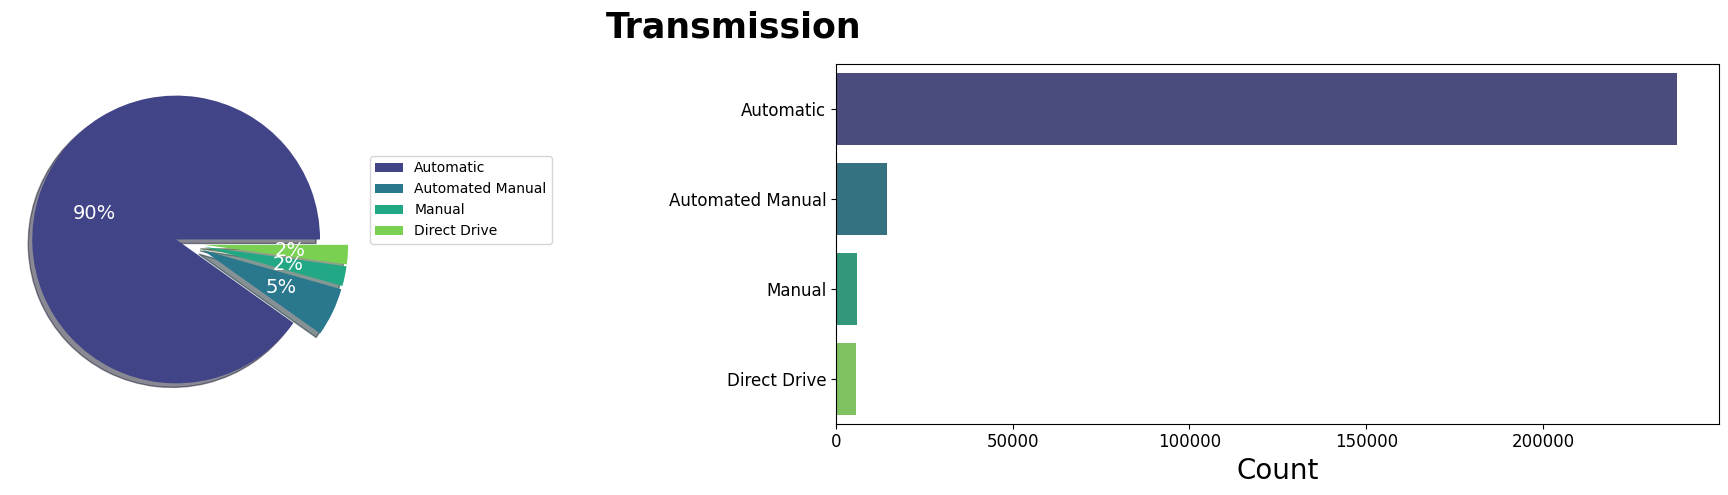

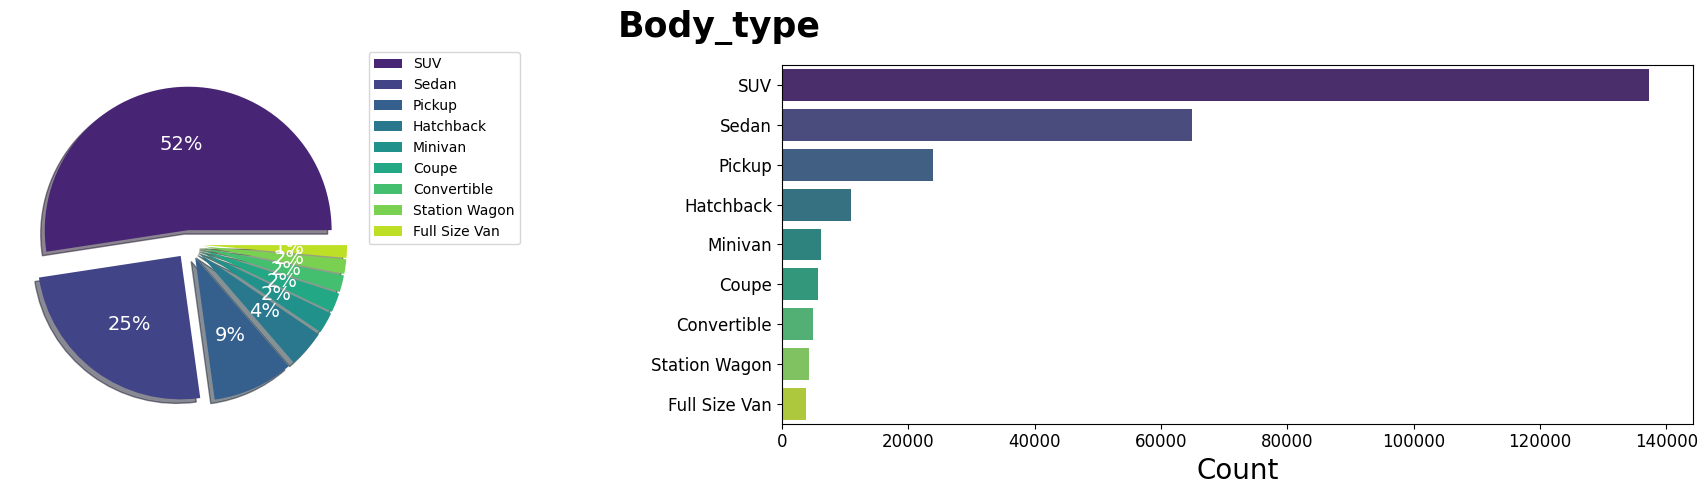

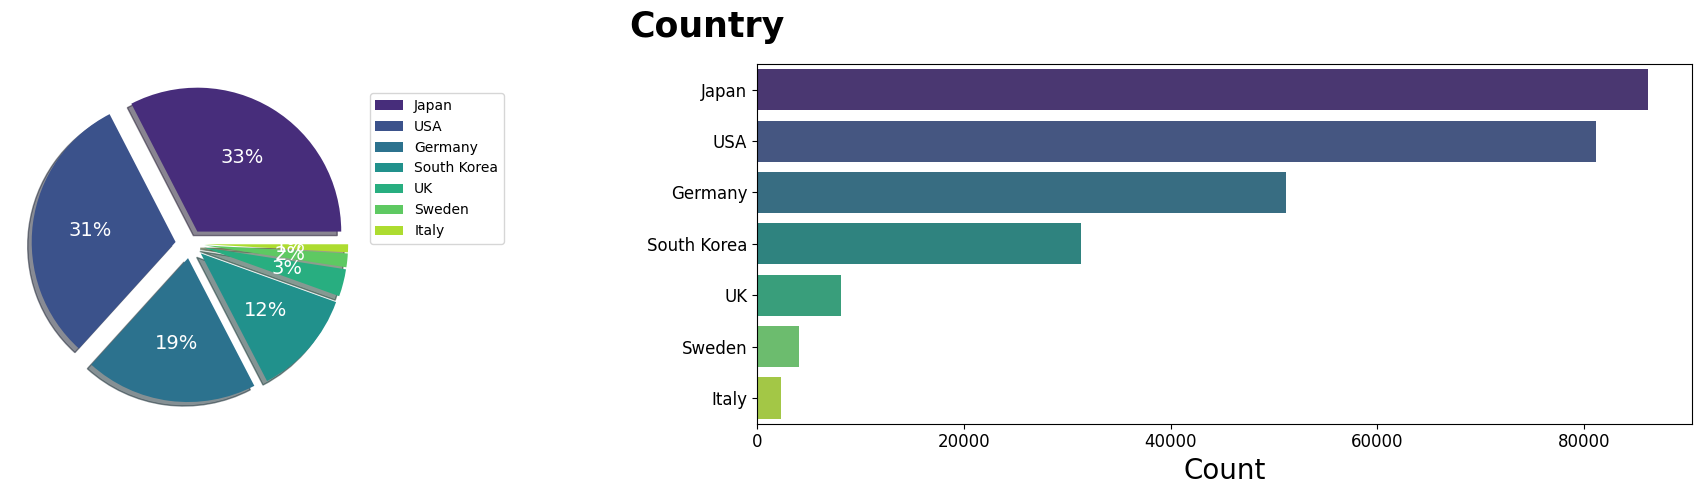

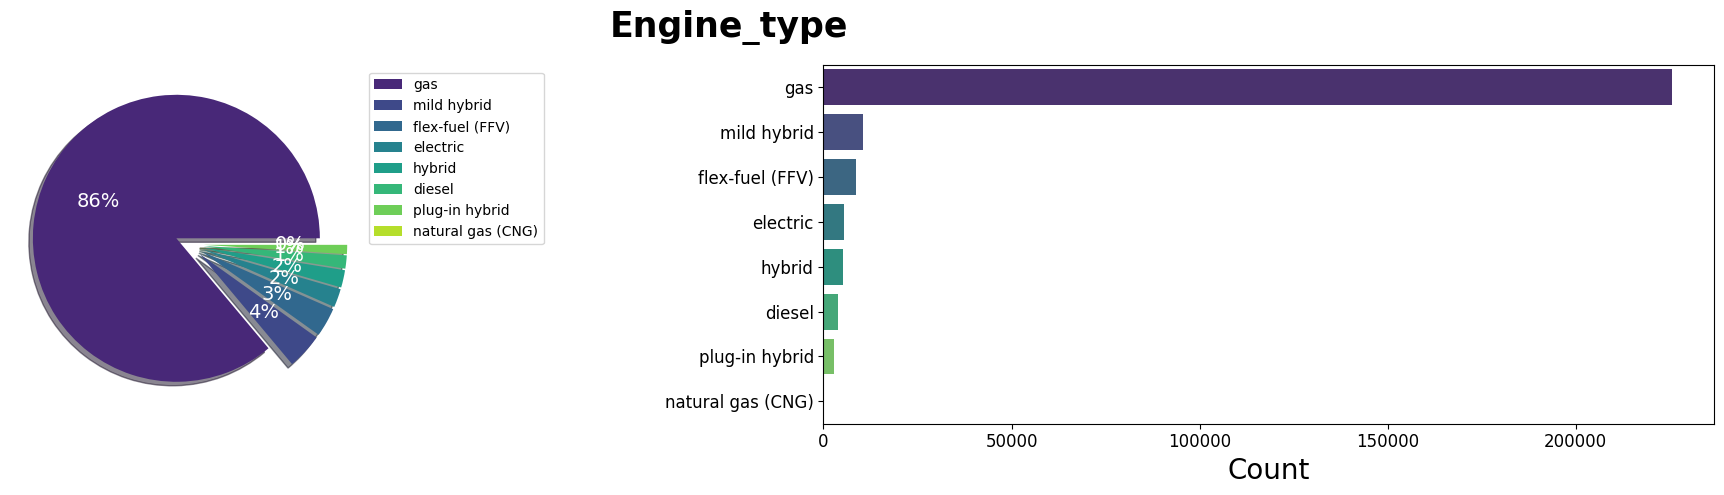

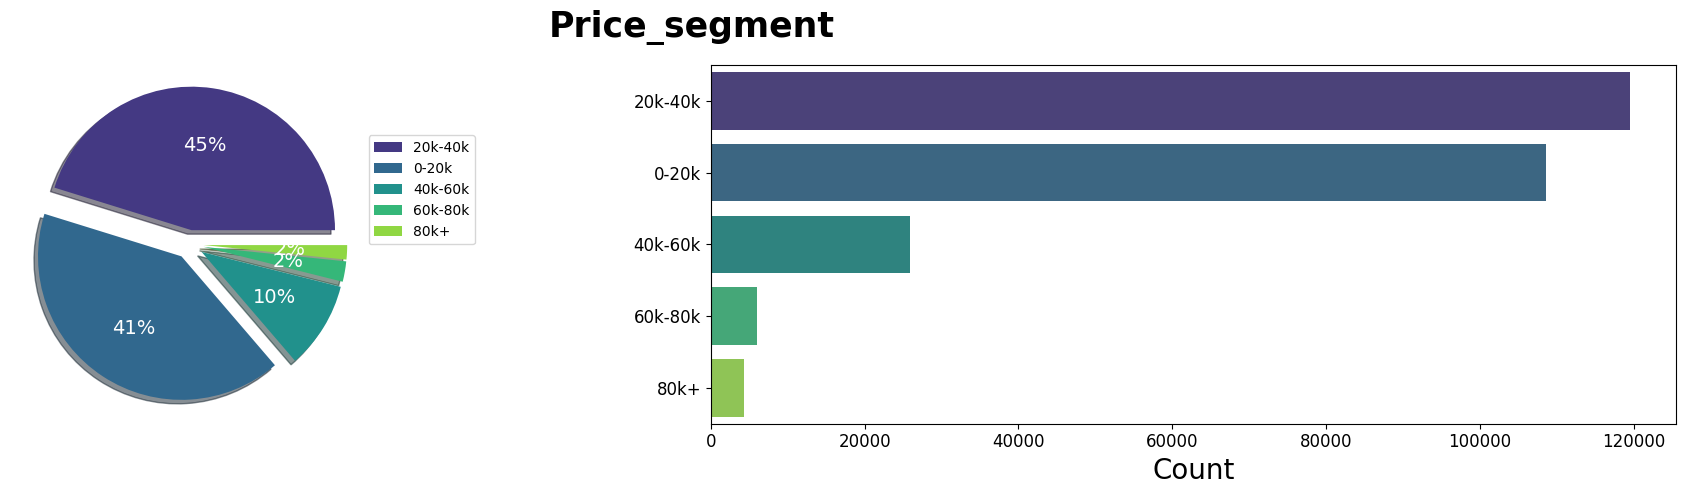

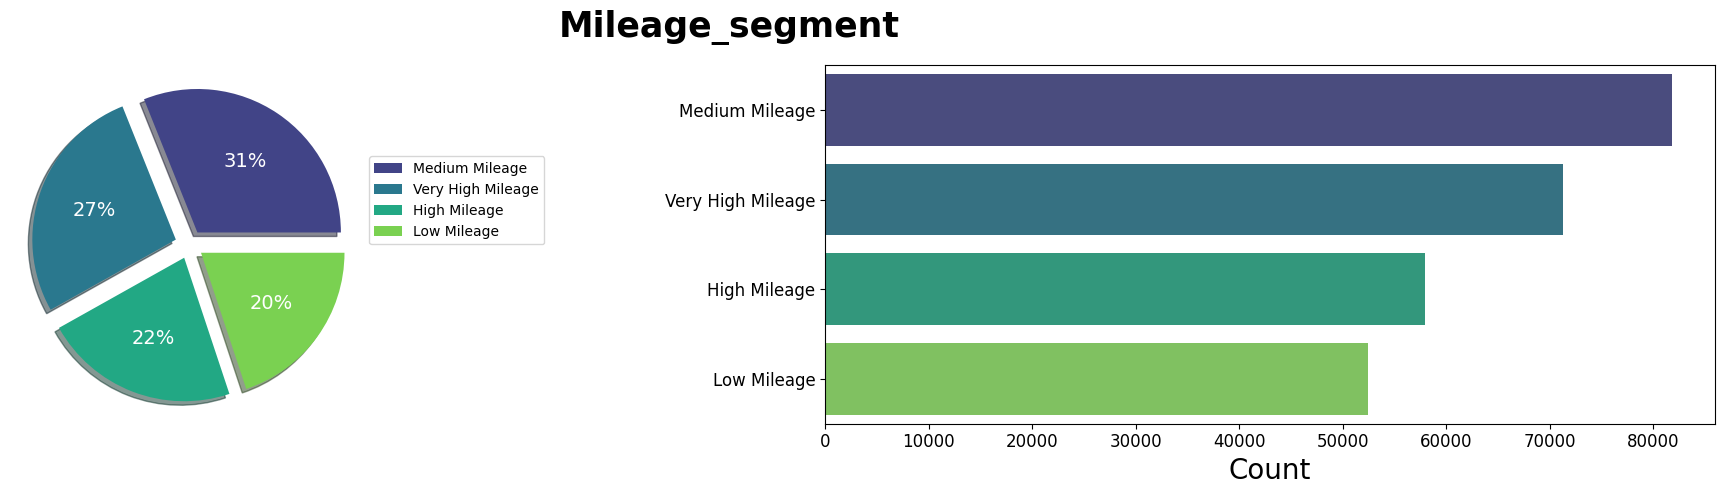

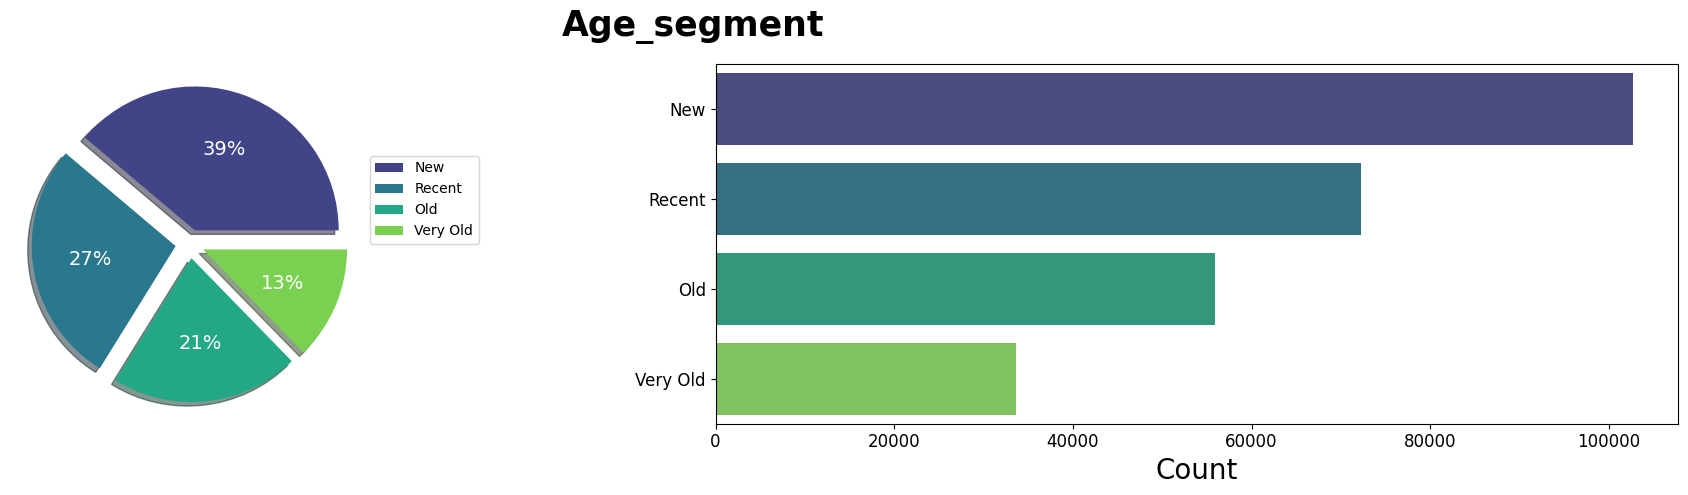

In [36]:
columns_to_look = ["transmission","body_type","country","engine_type","price_segment","mileage_segment","age_segment"]
for x in columns_to_look:
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax = ax.flatten()

    value_counts = df[x].value_counts().head(15)
    labels = value_counts.index.tolist()

    pie_colors = sns.color_palette('viridis', len(labels))
    ax[0].pie(
        value_counts,
        shadow=True,
        explode=[.1 for _ in range(value_counts.nunique())],
        autopct='%1.f%%',
        textprops={'size': 14, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].legend(labels, loc=(1.0, 0.5))
     
    ###################################################################################### 

    sns.countplot(data=df, y=x, ax=ax[1], palette=pie_colors, order=labels)
    ax[1].yaxis.label.set_size(20)
    plt.yticks(fontsize=12)
    ax[1].set_xlabel('Count', fontsize=20)
    ax[1].set_ylabel(None)
    plt.xticks(fontsize=12)

    fig.suptitle(x.capitalize(), fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()

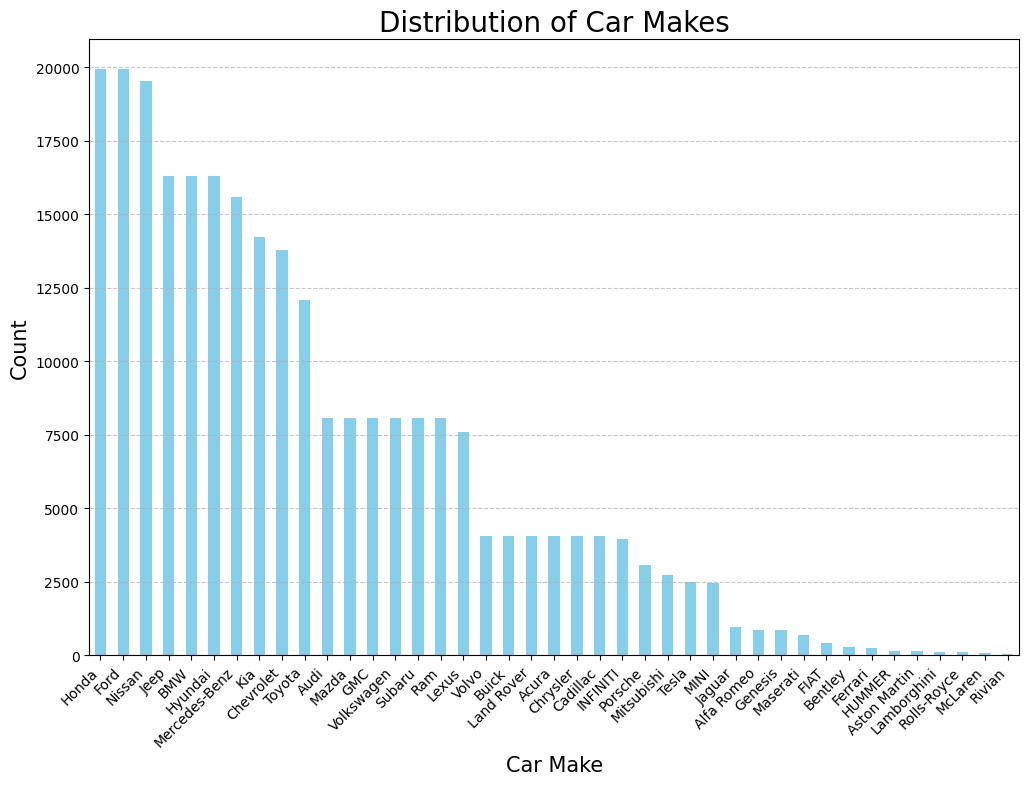

In [37]:
make_counts = df["make"].value_counts()

plt.figure(figsize=(12, 8))
make_counts.plot(kind="bar", color='skyblue')

plt.title('Distribution of Car Makes', fontsize=20)
plt.xlabel('Car Make', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()